<a href="https://colab.research.google.com/github/Farhan-hyd/Language_Detection/blob/main/laguage_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import re

import pandas as pd
import numpy as n
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

warnings.simplefilter("ignore")

In [6]:
data = pd.read_csv("/content/data/LanguageDetection.csv")
print(data.head(10))

                                                Text Language
0   Nature, in the broadest sense, is the natural...  English
1  "Nature" can refer to the phenomena of the phy...  English
2  The study of nature is a large, if not the onl...  English
3  Although humans are part of nature, human acti...  English
4  [1] The word nature is borrowed from the Old F...  English
5  [2] In ancient philosophy, natura is mostly us...  English
6  [3][4] \nThe concept of nature as a whole, the...  English
7  During the advent of modern scientific method ...  English
8  [5][6] With the Industrial revolution, nature ...  English
9  However, a vitalist vision of nature, closer t...  English


In [7]:
data["Language"].value_counts()

English       1385
French        1014
Spanish        819
Portugeese     739
Italian        698
Russian        692
Sweedish       676
Malayalam      594
Dutch          546
Arabic         536
Turkish        474
German         470
Tamil          469
Danish         428
Kannada        369
Greek          365
Hindi           63
Name: Language, dtype: int64

In [8]:
X = data["Text"]
y = data["Language"]

In [9]:
le = LabelEncoder()
y = le.fit_transform(y)

In [10]:
data_list = []
for text in X:
        text = re.sub(r'[!@#$(),n"%^*?:;~`0-9]', ' ', text)
        text = re.sub(r'[[]]', ' ', text)
        text = text.lower()
        data_list.append(text)

In [11]:
cv = CountVectorizer()
X = cv.fit_transform(data_list).toarray()
X.shape

(10337, 34937)

In [12]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [13]:
model = MultinomialNB()
model.fit(x_train, y_train)

MultinomialNB()

In [14]:
y_pred = model.predict(x_test)

In [15]:
ac = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("Accuracy is :",ac)

Accuracy is : 0.9738878143133463


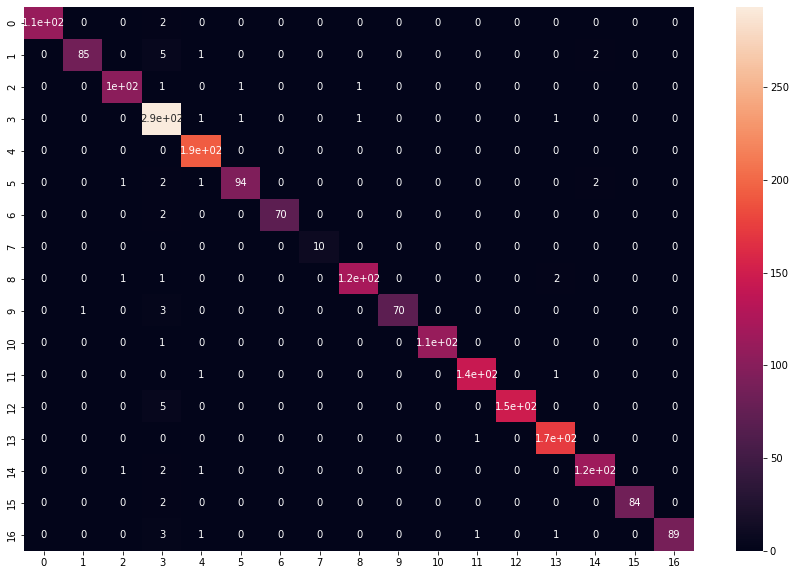

In [16]:
plt.figure(figsize=(15,10))
sns.heatmap(cm, annot = True)
plt.show()

In [57]:
def prediction(text):
     x = cv.transform([text]).toarray() 
     lang = model.predict(x)
     langs = model.predict_proba(x)
     isPresent = False
     for l in langs[0]:
       if l > 0.75:
         print()
         lang = le.inverse_transform(lang)
         print("The langauge is in",lang[0],"with probablity",l*100,"%")
         isPresent=True
     if(not isPresent):
       print("Language is not in dataset")

In [58]:
# Bengali
prediction(" পদে শিক্ষক নিয়োগের জন্য কত জন ইন্টারভিউ দিয়েছিলেন? নানা তথ্যে বিভ্রান্ত ")
# Hindi
prediction("कविता तो एक जीवन को तोड़कर सकल जीवन बनाती है। और जीवन टूटता है, वह कवि का है।")
# Tamil
prediction("வாழ்க்கை தத்துவம் திருக்குறள்")
# Malayalam
prediction("അനലിറ്റിക്സ്, ഡാറ്റാ സയൻസ് പ്രൊഫഷണലുകൾക്കായി കമ്മ്യൂണിറ്റി അധിഷ്ഠിത വിജ്ഞാന പോർട്ടൽ അനലിറ്റിക്സ് വിദ്യ നൽകുന്നു")

Language is not in dataset

The langauge is in Hindi with probablity 99.99999999815401 %

The langauge is in Tamil with probablity 93.47631178919625 %

The langauge is in Malayalam with probablity 99.99750039306603 %
